In [0]:
import json
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:


curpath = os.path.abspath(os.getcwd())
jsonfile=os.path.join(curpath,'drive','My Drive','data','sarcasm.json')

with open(jsonfile, 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [0]:
train_sz=int(len(sentences)*0.8)
train_sentences = sentences[0:train_sz]
test_sentences = sentences[train_sz:]
train_labels = labels[0:train_sz]
test_labels = labels[train_sz:]

In [0]:
voc_sz=10000
max_len=100
emb_dim=16

In [0]:
tokenizer = Tokenizer(num_words=voc_sz, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [0]:
# Convert everything to numpy array
import numpy as np
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_sz, emb_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/25
668/668 - 2s - loss: 0.6596 - accuracy: 0.6018 - val_loss: 0.5613 - val_accuracy: 0.7615
Epoch 2/25
668/668 - 2s - loss: 0.4239 - accuracy: 0.8370 - val_loss: 0.3917 - val_accuracy: 0.8285
Epoch 3/25
668/668 - 2s - loss: 0.3111 - accuracy: 0.8756 - val_loss: 0.3519 - val_accuracy: 0.8523
Epoch 4/25
668/668 - 2s - loss: 0.2600 - accuracy: 0.8984 - val_loss: 0.3455 - val_accuracy: 0.8531
Epoch 5/25
668/668 - 2s - loss: 0.2254 - accuracy: 0.9129 - val_loss: 0.3543 - val_accuracy: 0.8534
Epoch 6/25
668/668 - 2s - loss: 0.2011 - accuracy: 0.9225 - val_loss: 0.3565 - val_accuracy: 0.8510
Epoch 7/25
668/668 - 2s - loss: 0.1797 - accuracy: 0.9333 - val_loss: 0.3715 - val_accuracy: 0.8501
Epoch 8/25
668/668 - 2s - loss: 0.1623 - accuracy: 0.9398 - val_loss: 0.3786 - val_accuracy: 0.8508
Epoch 9/25
668/668 - 2s - loss: 0.1472 - accuracy: 0.9466 - val_loss: 0.3964 - val_accuracy: 0.8502
Epoch 10/25
668/668 - 2s - loss: 0.1342 - accuracy: 0.9513 - val_loss: 0.4358 - val_accuracy: 0.8405

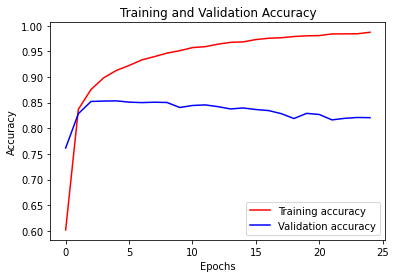

In [23]:
import matplotlib.pyplot as plt
train_acc=his.history['accuracy']
test_acc=his.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs,train_acc,'r',label='Training accuracy')
plt.plot(epochs,test_acc,'b',label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
print(model.predict(padded))

[[0.97456586]
 [0.00324632]]
